In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
# reading the DataFrame
df = pd.read_csv("Fraud.csv")

In [3]:
# checking the data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
# checking the shape of the data
df.shape

(6362620, 11)

In [5]:
# checking the head of the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# describing the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
# checking the correlation between the variables with the target variable
df.corr()["isFraud"].sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

<AxesSubplot:>

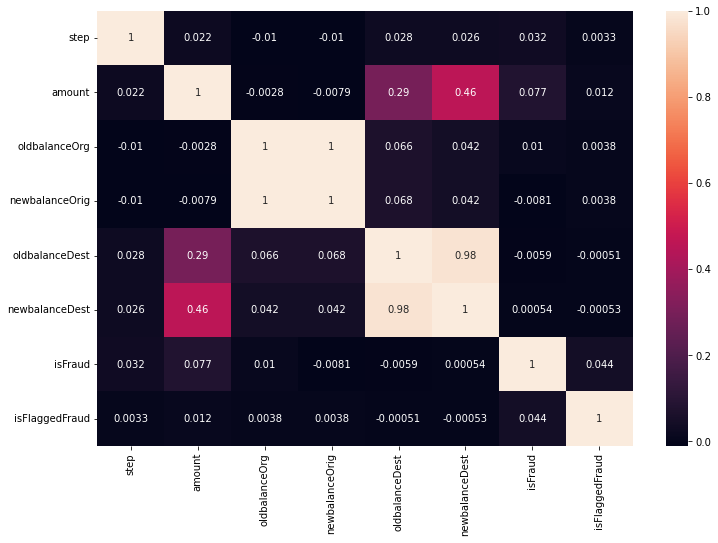

In [10]:
# heatmap of the correlation between the variables with the target variable
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [11]:
df["isFraud"].value_counts()
# as we see here we have an unbalanced dataset

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
df["isFraud"].value_counts(normalize=True)
# more than 90 % of the data is not fraud

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [13]:
# checking the payment type of the transactions
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

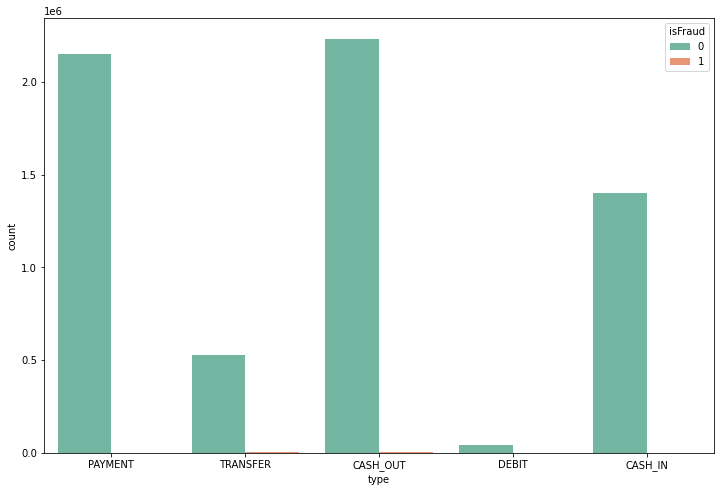

In [14]:
# counting the number of transactions per type
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")
# we are enable to analyse the Fraud transactions 
# as we have non fraud transactions more than fraud transactions

In [15]:
# dropping the variables that are not needed
# making a copy of the data
df_copy = df.copy()
df_copy.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
# checking the step variable
# About the step : maps a unit of time in the real world
# In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
df["step"].value_counts().sort_values(ascending=False).head()

19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64

In [17]:
# columns with object type
df_copy.select_dtypes(include=["object"]).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [18]:
# droping NameOrig and NameDest
df_copy.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [19]:
df_copy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [20]:
# Label Encoding the type variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy["type"] = le.fit_transform(df_copy["type"])

In [21]:
df_copy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [22]:
# dropping the isFlaggedFraud variable as we dont need it
df_copy.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [23]:
df_copy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [24]:
# choosing a model to use
# we will use Logistic Regression as we have unbalanced dataset
# First we need to create a training and test set
from sklearn.model_selection import train_test_split
X = df_copy.drop("isFraud",axis=1).values
y = df_copy["isFraud"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# we need to feature scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2', C=1000)
log_reg.fit(X_train,y_train)
pred_test = log_reg.predict(X_test)
pred_train = log_reg.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ('Score Report of the imbalanced data (with hyperparameter pruning)\n')

print ('Accuracy score: ')
print ('Training: %.2f' % accuracy_score(y_train, pred_train))
print ('Testing: %.2f \n' % accuracy_score(y_test, pred_test))

print ('Precision score: ')
print ('Training: %.2f' % precision_score(y_train, pred_train))
print ('Testing: %.2f \n' % precision_score(y_test, pred_test))

print ('Recall score: ')
print ('Training: %.2f' % recall_score(y_train, pred_train))
print ('Testing: %.2f \n' % recall_score(y_test, pred_test))

print ('F1 score: ')
print ('Training: %.2f' % f1_score(y_train, pred_train))
print ('Testing: %.2f' % f1_score(y_test, pred_test))

Score Report of the imbalanced data (with hyperparameter pruning)

Accuracy score: 
Training: 1.00
Testing: 1.00 

Precision score: 
Training: 0.90
Testing: 0.91 

Recall score: 
Training: 0.48
Testing: 0.48 

F1 score: 
Training: 0.63
Testing: 0.63


In [30]:
# checking the accuracy of the model
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[1270829      75]
 [    943     677]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.42      0.57      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524

